In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
agra_meteo = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Metrological Data/Agra.csv', skiprows = 2, delimiter=',')
agra_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,6.9,100,0.0,997.4,3.4,5.0,30,342
1,2024-01-01T01:00,7.6,99,0.0,998.7,5.4,6.5,6,340
2,2024-01-01T02:00,7.4,99,0.0,999.1,5.4,9.1,7,340
3,2024-01-01T03:00,8.3,98,0.0,999.8,4.7,11.1,13,351
4,2024-01-01T04:00,10.7,95,0.0,1000.6,3.6,9.6,20,6
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.8,92,0.0,999.7,6.7,14.7,345,341
8780,2024-12-31T20:00,8.9,94,0.0,999.0,4.1,11.3,338,326
8781,2024-12-31T21:00,8.4,96,0.0,998.1,4.7,10.8,323,302
8782,2024-12-31T22:00,8.2,97,0.0,997.9,6.9,13.4,312,293


In [3]:
agra_pollutants = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Pollutants/Agra.csv', delimiter= ',')
agra_pollutants['Timestamp'] = agra_meteo['time']
agra_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
agra_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,44.02,94.13,9.65,20.35,23.03,13.50,10.57,0.47,9.91,...,0.07,10.13,76.89,0.69,103.02,0.0,0.0,4.66,744.15,-0.16
1,2024-01-01T01:00,43.57,83.62,8.53,19.45,21.34,12.54,10.38,0.46,10.65,...,0.06,9.58,77.90,0.71,124.63,0.0,0.0,4.65,744.04,-0.21
2,2024-01-01T02:00,43.26,75.32,9.29,19.58,21.69,11.53,10.35,0.49,10.29,...,0.06,8.79,74.92,0.92,97.91,0.0,0.0,4.65,744.01,-0.26
3,2024-01-01T03:00,37.94,71.79,9.22,20.14,21.79,11.61,10.73,0.44,11.44,...,0.05,9.04,77.08,1.11,153.08,0.0,0.0,4.26,743.94,-0.20
4,2024-01-01T04:00,37.00,66.36,9.79,20.33,22.33,11.45,11.04,0.37,11.10,...,0.05,9.33,91.19,1.16,157.51,0.0,0.0,4.84,743.92,-0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.78,66.42,6.82,22.10,24.40,14.25,11.35,0.26,11.21,...,0.04,11.58,65.37,0.78,149.92,0.0,0.0,5.73,746.21,-0.22
8780,2024-12-31T20:00,32.08,78.67,6.75,21.51,27.56,14.28,11.39,0.25,10.59,...,0.04,11.76,67.06,0.70,130.09,0.0,0.0,5.73,746.81,-0.21
8781,2024-12-31T21:00,35.96,87.26,6.70,21.66,24.10,13.55,11.22,0.24,9.71,...,0.04,11.48,66.62,0.75,143.73,0.0,0.0,5.72,746.59,-0.18
8782,2024-12-31T22:00,36.14,89.99,6.83,21.49,24.16,12.86,10.98,0.23,9.41,...,0.04,11.27,67.27,0.76,157.12,0.0,0.0,5.67,746.91,-0.18


In [4]:
agra = pd.merge(agra_meteo.iloc[:, :], agra_pollutants.iloc[:, 0:3], on='time')
agra

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,6.9,100,0.0,997.4,3.4,5.0,30,342,44.02,94.13
1,2024-01-01T01:00,7.6,99,0.0,998.7,5.4,6.5,6,340,43.57,83.62
2,2024-01-01T02:00,7.4,99,0.0,999.1,5.4,9.1,7,340,43.26,75.32
3,2024-01-01T03:00,8.3,98,0.0,999.8,4.7,11.1,13,351,37.94,71.79
4,2024-01-01T04:00,10.7,95,0.0,1000.6,3.6,9.6,20,6,37.00,66.36
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.8,92,0.0,999.7,6.7,14.7,345,341,25.78,66.42
8780,2024-12-31T20:00,8.9,94,0.0,999.0,4.1,11.3,338,326,32.08,78.67
8781,2024-12-31T21:00,8.4,96,0.0,998.1,4.7,10.8,323,302,35.96,87.26
8782,2024-12-31T22:00,8.2,97,0.0,997.9,6.9,13.4,312,293,36.14,89.99


In [5]:
agra['city'] = 'Agra'
agra

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,6.9,100,0.0,997.4,3.4,5.0,30,342,44.02,94.13,Agra
1,2024-01-01T01:00,7.6,99,0.0,998.7,5.4,6.5,6,340,43.57,83.62,Agra
2,2024-01-01T02:00,7.4,99,0.0,999.1,5.4,9.1,7,340,43.26,75.32,Agra
3,2024-01-01T03:00,8.3,98,0.0,999.8,4.7,11.1,13,351,37.94,71.79,Agra
4,2024-01-01T04:00,10.7,95,0.0,1000.6,3.6,9.6,20,6,37.00,66.36,Agra
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.8,92,0.0,999.7,6.7,14.7,345,341,25.78,66.42,Agra
8780,2024-12-31T20:00,8.9,94,0.0,999.0,4.1,11.3,338,326,32.08,78.67,Agra
8781,2024-12-31T21:00,8.4,96,0.0,998.1,4.7,10.8,323,302,35.96,87.26,Agra
8782,2024-12-31T22:00,8.2,97,0.0,997.9,6.9,13.4,312,293,36.14,89.99,Agra


In [6]:
agra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_100m (°)   8784 non-null   int64  
 8   wind_direction_10m (°)    8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    agra[delay1_col] = agra[col].shift(1)
    delay2_col = col + "_delay2"
    agra[delay2_col] = agra[col].shift(2)
    agra.loc[0, delay1_col] = agra[col].iloc[-1]
    agra.loc[1, delay2_col] = agra[col].iloc[-1]
    agra.loc[0, delay2_col] = agra[col].iloc[-2]

agra

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.9,100,0.0,997.4,3.4,5.0,30,342,44.02,94.13,Agra,33.04,36.14,83.42,89.99
1,2024-01-01T01:00,7.6,99,0.0,998.7,5.4,6.5,6,340,43.57,83.62,Agra,44.02,33.04,94.13,83.42
2,2024-01-01T02:00,7.4,99,0.0,999.1,5.4,9.1,7,340,43.26,75.32,Agra,43.57,44.02,83.62,94.13
3,2024-01-01T03:00,8.3,98,0.0,999.8,4.7,11.1,13,351,37.94,71.79,Agra,43.26,43.57,75.32,83.62
4,2024-01-01T04:00,10.7,95,0.0,1000.6,3.6,9.6,20,6,37.00,66.36,Agra,37.94,43.26,71.79,75.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,9.8,92,0.0,999.7,6.7,14.7,345,341,25.78,66.42,Agra,28.36,28.23,73.48,72.36
8780,2024-12-31T20:00,8.9,94,0.0,999.0,4.1,11.3,338,326,32.08,78.67,Agra,25.78,28.36,66.42,73.48
8781,2024-12-31T21:00,8.4,96,0.0,998.1,4.7,10.8,323,302,35.96,87.26,Agra,32.08,25.78,78.67,66.42
8782,2024-12-31T22:00,8.2,97,0.0,997.9,6.9,13.4,312,293,36.14,89.99,Agra,35.96,32.08,87.26,78.67


In [8]:
kanpur_meteo = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Metrological Data/Kanpur.csv', skiprows=2, delimiter=',')
kanpur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,12.0,88,0.0,1001.3,3.6,6.4,47,37
1,2024-01-01T01:00,11.1,91,0.0,1002.5,6.5,10.9,44,34
2,2024-01-01T02:00,11.7,89,0.0,1002.9,5.8,11.7,45,30
3,2024-01-01T03:00,12.8,86,0.0,1003.5,4.8,11.2,48,42
4,2024-01-01T04:00,14.3,81,0.0,1004.1,4.6,6.1,50,51
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.0,92,0.0,1002.9,5.3,15.4,307,288
8780,2024-12-31T20:00,9.9,92,0.0,1002.3,5.9,17.3,308,297
8781,2024-12-31T21:00,9.9,91,0.0,1001.6,6.9,18.6,303,295
8782,2024-12-31T22:00,9.6,93,0.0,1001.0,7.2,18.5,304,297


In [9]:
kanpur_meteo['time'] = pd.to_datetime(kanpur_meteo['time'])
kanpur_meteo.set_index('time', inplace=True)
kanpur_meteo = kanpur_meteo.resample('D').mean().reset_index()
kanpur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01,14.116667,83.458333,0.000000,1001.404167,4.983333,7.325000,241.250000,196.375000
1,2024-01-02,12.987500,85.541667,0.029167,1000.904167,6.554167,11.566667,284.708333,270.500000
2,2024-01-03,13.858333,87.958333,0.508333,1000.412500,6.087500,10.054167,104.875000,113.791667
3,2024-01-04,16.262500,82.000000,0.000000,1000.533333,5.204167,9.216667,309.333333,267.416667
4,2024-01-05,15.050000,84.375000,0.191667,1001.154167,5.033333,7.395833,105.166667,105.250000
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,20.050000,71.291667,0.000000,1001.712500,8.166667,16.316667,117.458333,115.708333
362,2024-12-28,18.208333,83.000000,0.137500,1001.612500,8.104167,14.558333,138.875000,125.375000
363,2024-12-29,17.579167,80.333333,0.004167,1002.329167,9.004167,16.454167,285.625000,282.416667
364,2024-12-30,14.750000,82.333333,0.000000,1002.916667,6.012500,12.033333,303.500000,299.416667


In [10]:
kanpur_pollutants = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Pollutants/Kanpur.csv', delimiter= ',')
kanpur_pollutants['Timestamp'] = kanpur_meteo['time']
kanpur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
kanpur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,62.95,136.58,6.18,16.71,20.63,13.24,12.88,1.08,7.06,...,0.35,13.21,87.05,0.58,210.69,0.00,0.00,30.00,751.85,-0.06
1,2024-01-02,61.83,131.90,5.80,16.32,19.95,13.11,12.72,1.02,11.04,...,0.32,12.41,89.84,0.66,253.19,0.00,0.00,16.04,751.68,-0.06
2,2024-01-03,57.61,125.70,7.08,20.22,24.65,14.18,13.73,1.22,13.94,...,0.38,13.60,92.60,0.71,233.82,0.11,0.11,24.98,751.38,-0.06
3,2024-01-04,58.45,132.09,5.75,17.45,20.90,14.82,13.49,1.15,13.20,...,0.38,15.33,90.32,0.66,254.07,0.00,0.00,17.97,751.54,-0.06
4,2024-01-05,51.71,114.26,5.80,18.38,21.69,14.46,13.67,1.06,17.16,...,0.32,15.02,91.23,0.54,178.46,0.04,0.04,14.59,751.64,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,56.05,98.97,3.32,20.33,20.23,8.15,20.91,0.98,20.92,...,0.26,20.31,76.36,0.89,140.71,0.00,0.00,118.38,751.79,-0.06
362,2024-12-28,41.51,80.33,2.72,19.99,20.06,8.15,20.89,0.88,20.02,...,0.20,19.92,78.97,0.98,144.21,0.02,0.02,103.86,751.52,-0.06
363,2024-12-29,42.26,89.32,2.44,18.17,19.14,8.14,20.74,0.99,14.76,...,0.22,17.20,90.31,1.17,227.28,0.00,0.00,85.67,751.84,-0.05
364,2024-12-30,36.45,64.34,2.46,15.74,17.95,8.18,20.11,0.90,15.70,...,0.16,13.94,90.68,1.36,265.60,0.00,0.00,83.44,752.20,-0.06


In [11]:
kanpur = pd.merge(kanpur_meteo.iloc[:, :], kanpur_pollutants.iloc[:, 0:3], on='time')
kanpur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01,14.116667,83.458333,0.000000,1001.404167,4.983333,7.325000,241.250000,196.375000,62.95,136.58
1,2024-01-02,12.987500,85.541667,0.029167,1000.904167,6.554167,11.566667,284.708333,270.500000,61.83,131.90
2,2024-01-03,13.858333,87.958333,0.508333,1000.412500,6.087500,10.054167,104.875000,113.791667,57.61,125.70
3,2024-01-04,16.262500,82.000000,0.000000,1000.533333,5.204167,9.216667,309.333333,267.416667,58.45,132.09
4,2024-01-05,15.050000,84.375000,0.191667,1001.154167,5.033333,7.395833,105.166667,105.250000,51.71,114.26
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,20.050000,71.291667,0.000000,1001.712500,8.166667,16.316667,117.458333,115.708333,56.05,98.97
362,2024-12-28,18.208333,83.000000,0.137500,1001.612500,8.104167,14.558333,138.875000,125.375000,41.51,80.33
363,2024-12-29,17.579167,80.333333,0.004167,1002.329167,9.004167,16.454167,285.625000,282.416667,42.26,89.32
364,2024-12-30,14.750000,82.333333,0.000000,1002.916667,6.012500,12.033333,303.500000,299.416667,36.45,64.34


In [12]:
kanpur['city'] = 'Kanpur'
kanpur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01,14.116667,83.458333,0.000000,1001.404167,4.983333,7.325000,241.250000,196.375000,62.95,136.58,Kanpur
1,2024-01-02,12.987500,85.541667,0.029167,1000.904167,6.554167,11.566667,284.708333,270.500000,61.83,131.90,Kanpur
2,2024-01-03,13.858333,87.958333,0.508333,1000.412500,6.087500,10.054167,104.875000,113.791667,57.61,125.70,Kanpur
3,2024-01-04,16.262500,82.000000,0.000000,1000.533333,5.204167,9.216667,309.333333,267.416667,58.45,132.09,Kanpur
4,2024-01-05,15.050000,84.375000,0.191667,1001.154167,5.033333,7.395833,105.166667,105.250000,51.71,114.26,Kanpur
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,20.050000,71.291667,0.000000,1001.712500,8.166667,16.316667,117.458333,115.708333,56.05,98.97,Kanpur
362,2024-12-28,18.208333,83.000000,0.137500,1001.612500,8.104167,14.558333,138.875000,125.375000,41.51,80.33,Kanpur
363,2024-12-29,17.579167,80.333333,0.004167,1002.329167,9.004167,16.454167,285.625000,282.416667,42.26,89.32,Kanpur
364,2024-12-30,14.750000,82.333333,0.000000,1002.916667,6.012500,12.033333,303.500000,299.416667,36.45,64.34,Kanpur


In [13]:
kanpur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_100m (°)   366 non-null    float64       
 8   wind_direction_10m (°)    366 non-null    float64       
 9   PM2.5 (µg/m³)             366 non-null    float64       
 10  PM10 (µg/m³)              366 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [14]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    kanpur[delay1_col] = kanpur[col].shift(1)
    delay2_col = col + "_delay2"
    kanpur[delay2_col] = kanpur[col].shift(2)
    kanpur.loc[0, delay1_col] = kanpur[col].iloc[-1]
    kanpur.loc[1, delay2_col] = kanpur[col].iloc[-1]
    kanpur.loc[0, delay2_col] = kanpur[col].iloc[-2]

kanpur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,14.116667,83.458333,0.000000,1001.404167,4.983333,7.325000,241.250000,196.375000,62.95,136.58,Kanpur,24.89,36.45,58.17,64.34
1,2024-01-02,12.987500,85.541667,0.029167,1000.904167,6.554167,11.566667,284.708333,270.500000,61.83,131.90,Kanpur,62.95,24.89,136.58,58.17
2,2024-01-03,13.858333,87.958333,0.508333,1000.412500,6.087500,10.054167,104.875000,113.791667,57.61,125.70,Kanpur,61.83,62.95,131.90,136.58
3,2024-01-04,16.262500,82.000000,0.000000,1000.533333,5.204167,9.216667,309.333333,267.416667,58.45,132.09,Kanpur,57.61,61.83,125.70,131.90
4,2024-01-05,15.050000,84.375000,0.191667,1001.154167,5.033333,7.395833,105.166667,105.250000,51.71,114.26,Kanpur,58.45,57.61,132.09,125.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,20.050000,71.291667,0.000000,1001.712500,8.166667,16.316667,117.458333,115.708333,56.05,98.97,Kanpur,65.61,51.21,110.19,84.35
362,2024-12-28,18.208333,83.000000,0.137500,1001.612500,8.104167,14.558333,138.875000,125.375000,41.51,80.33,Kanpur,56.05,65.61,98.97,110.19
363,2024-12-29,17.579167,80.333333,0.004167,1002.329167,9.004167,16.454167,285.625000,282.416667,42.26,89.32,Kanpur,41.51,56.05,80.33,98.97
364,2024-12-30,14.750000,82.333333,0.000000,1002.916667,6.012500,12.033333,303.500000,299.416667,36.45,64.34,Kanpur,42.26,41.51,89.32,80.33


In [15]:
lucknow_meteo = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Metrological Data/Lucknow.csv', skiprows=2, delimiter=',')
lucknow_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,8.0,100,0.0,1002.3,5.5,6.0,295,302
1,2024-01-01T01:00,10.2,95,0.0,1003.6,2.4,5.2,16,27
2,2024-01-01T02:00,10.2,95,0.0,1004.2,3.1,5.6,15,36
3,2024-01-01T03:00,12.0,88,0.0,1004.7,4.0,7.9,16,27
4,2024-01-01T04:00,14.3,80,0.0,1005.2,4.5,5.9,11,14
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,10.9,88,0.0,1003.8,7.8,17.2,294,277
8780,2024-12-31T20:00,10.5,89,0.0,1003.5,8.2,18.4,291,280
8781,2024-12-31T21:00,10.0,91,0.0,1002.5,7.7,17.6,296,286
8782,2024-12-31T22:00,9.7,92,0.0,1001.9,7.7,17.2,293,279


In [16]:
lucknow_meteo['time'] = pd.to_datetime(lucknow_meteo['time'])
lucknow_meteo.set_index('time', inplace=True)
lucknow_meteo = lucknow_meteo.resample('D').mean().reset_index()
lucknow_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01,14.720833,81.791667,0.000000,1002.454167,4.858333,7.704167,271.458333,252.333333
1,2024-01-02,12.741667,84.666667,0.000000,1002.020833,6.366667,11.366667,306.541667,305.375000
2,2024-01-03,14.150000,85.666667,0.012500,1001.562500,5.250000,8.566667,175.125000,168.083333
3,2024-01-04,14.820833,86.250000,0.412500,1001.591667,6.483333,11.662500,300.041667,297.958333
4,2024-01-05,14.812500,85.000000,0.000000,1002.254167,4.800000,7.441667,205.291667,169.791667
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.645833,67.708333,0.000000,1003.087500,7.166667,14.508333,101.541667,105.291667
362,2024-12-28,17.975000,82.125000,0.020833,1002.991667,7.095833,12.629167,139.583333,150.833333
363,2024-12-29,17.070833,85.541667,0.012500,1003.079167,8.945833,16.329167,281.625000,272.541667
364,2024-12-30,15.045833,83.458333,0.000000,1003.841667,7.212500,13.333333,295.250000,283.458333


In [17]:
lucknow_pollutants = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Pollutants/Lucknow.csv', delimiter= ',')
lucknow_pollutants['Timestamp'] = lucknow_meteo['time']
lucknow_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
lucknow_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,70.21,138.87,8.55,11.17,15.21,36.14,9.42,1.03,17.49,...,1.58,12.94,90.58,0.68,176.73,0.00,0.00,100.30,749.33,-0.40
1,2024-01-02,72.34,140.54,7.31,10.04,13.44,35.99,8.91,0.92,21.49,...,1.56,13.42,88.33,0.72,199.35,0.00,0.00,115.65,749.37,-0.36
2,2024-01-03,124.24,193.76,26.70,14.60,30.99,56.09,11.98,1.08,18.35,...,1.59,13.63,93.48,0.66,178.59,0.01,0.01,108.30,749.48,-0.86
3,2024-01-04,98.83,151.90,16.31,13.15,21.81,45.40,9.71,0.85,21.90,...,1.56,14.70,92.50,0.56,207.96,0.00,0.00,99.87,749.78,-0.61
4,2024-01-05,64.04,105.59,15.41,12.74,20.99,38.62,10.26,0.80,22.01,...,1.50,14.63,95.13,0.60,199.12,0.03,0.02,103.24,749.80,-0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,67.76,137.04,9.37,10.83,15.99,37.73,13.84,0.76,27.13,...,1.62,18.63,71.97,0.84,177.59,0.00,0.00,98.38,749.56,0.54
362,2024-12-28,53.82,108.09,9.14,10.76,15.65,37.77,13.27,0.68,20.31,...,1.55,18.52,76.18,0.87,173.53,0.00,0.00,103.50,749.70,0.62
363,2024-12-29,67.26,137.30,9.18,10.62,15.65,36.95,12.43,0.73,19.08,...,1.55,17.15,90.24,0.80,177.67,0.00,0.00,105.85,749.80,0.33
364,2024-12-30,34.75,81.68,9.24,10.68,15.57,37.83,12.66,0.67,17.34,...,1.50,14.84,90.10,0.83,184.65,0.00,0.00,36.55,749.18,0.19


In [18]:
lucknow = pd.merge(lucknow_meteo.iloc[:, :], lucknow_pollutants.iloc[:, 0:3], on='time')
lucknow

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01,14.720833,81.791667,0.000000,1002.454167,4.858333,7.704167,271.458333,252.333333,70.21,138.87
1,2024-01-02,12.741667,84.666667,0.000000,1002.020833,6.366667,11.366667,306.541667,305.375000,72.34,140.54
2,2024-01-03,14.150000,85.666667,0.012500,1001.562500,5.250000,8.566667,175.125000,168.083333,124.24,193.76
3,2024-01-04,14.820833,86.250000,0.412500,1001.591667,6.483333,11.662500,300.041667,297.958333,98.83,151.90
4,2024-01-05,14.812500,85.000000,0.000000,1002.254167,4.800000,7.441667,205.291667,169.791667,64.04,105.59
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.645833,67.708333,0.000000,1003.087500,7.166667,14.508333,101.541667,105.291667,67.76,137.04
362,2024-12-28,17.975000,82.125000,0.020833,1002.991667,7.095833,12.629167,139.583333,150.833333,53.82,108.09
363,2024-12-29,17.070833,85.541667,0.012500,1003.079167,8.945833,16.329167,281.625000,272.541667,67.26,137.30
364,2024-12-30,15.045833,83.458333,0.000000,1003.841667,7.212500,13.333333,295.250000,283.458333,34.75,81.68


In [19]:
lucknow['city'] = 'Lucknow'
lucknow

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01,14.720833,81.791667,0.000000,1002.454167,4.858333,7.704167,271.458333,252.333333,70.21,138.87,Lucknow
1,2024-01-02,12.741667,84.666667,0.000000,1002.020833,6.366667,11.366667,306.541667,305.375000,72.34,140.54,Lucknow
2,2024-01-03,14.150000,85.666667,0.012500,1001.562500,5.250000,8.566667,175.125000,168.083333,124.24,193.76,Lucknow
3,2024-01-04,14.820833,86.250000,0.412500,1001.591667,6.483333,11.662500,300.041667,297.958333,98.83,151.90,Lucknow
4,2024-01-05,14.812500,85.000000,0.000000,1002.254167,4.800000,7.441667,205.291667,169.791667,64.04,105.59,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.645833,67.708333,0.000000,1003.087500,7.166667,14.508333,101.541667,105.291667,67.76,137.04,Lucknow
362,2024-12-28,17.975000,82.125000,0.020833,1002.991667,7.095833,12.629167,139.583333,150.833333,53.82,108.09,Lucknow
363,2024-12-29,17.070833,85.541667,0.012500,1003.079167,8.945833,16.329167,281.625000,272.541667,67.26,137.30,Lucknow
364,2024-12-30,15.045833,83.458333,0.000000,1003.841667,7.212500,13.333333,295.250000,283.458333,34.75,81.68,Lucknow


In [20]:
lucknow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_100m (°)   366 non-null    float64       
 8   wind_direction_10m (°)    366 non-null    float64       
 9   PM2.5 (µg/m³)             366 non-null    float64       
 10  PM10 (µg/m³)              366 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [21]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    lucknow[delay1_col] = lucknow[col].shift(1)
    delay2_col = col + "_delay2"
    lucknow[delay2_col] = lucknow[col].shift(2)
    lucknow.loc[0, delay1_col] = lucknow[col].iloc[-1]
    lucknow.loc[1, delay2_col] = lucknow[col].iloc[-1]
    lucknow.loc[0, delay2_col] = lucknow[col].iloc[-2]

lucknow

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,14.720833,81.791667,0.000000,1002.454167,4.858333,7.704167,271.458333,252.333333,70.21,138.87,Lucknow,42.96,34.75,95.36,81.68
1,2024-01-02,12.741667,84.666667,0.000000,1002.020833,6.366667,11.366667,306.541667,305.375000,72.34,140.54,Lucknow,70.21,42.96,138.87,95.36
2,2024-01-03,14.150000,85.666667,0.012500,1001.562500,5.250000,8.566667,175.125000,168.083333,124.24,193.76,Lucknow,72.34,70.21,140.54,138.87
3,2024-01-04,14.820833,86.250000,0.412500,1001.591667,6.483333,11.662500,300.041667,297.958333,98.83,151.90,Lucknow,124.24,72.34,193.76,140.54
4,2024-01-05,14.812500,85.000000,0.000000,1002.254167,4.800000,7.441667,205.291667,169.791667,64.04,105.59,Lucknow,98.83,124.24,151.90,193.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,19.645833,67.708333,0.000000,1003.087500,7.166667,14.508333,101.541667,105.291667,67.76,137.04,Lucknow,77.41,71.00,156.06,144.24
362,2024-12-28,17.975000,82.125000,0.020833,1002.991667,7.095833,12.629167,139.583333,150.833333,53.82,108.09,Lucknow,67.76,77.41,137.04,156.06
363,2024-12-29,17.070833,85.541667,0.012500,1003.079167,8.945833,16.329167,281.625000,272.541667,67.26,137.30,Lucknow,53.82,67.76,108.09,137.04
364,2024-12-30,15.045833,83.458333,0.000000,1003.841667,7.212500,13.333333,295.250000,283.458333,34.75,81.68,Lucknow,67.26,53.82,137.30,108.09


In [22]:
varanasi_meteo = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Metrological Data/Varanasi.csv', skiprows=2, delimiter = ',')
varanasi_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,8.5,99,0.0,1007.5,2.3,3.3,283,252
1,2024-01-01T01:00,8.4,98,0.0,1009.0,0.4,2.9,360,270
2,2024-01-01T02:00,8.8,99,0.0,1009.6,0.7,1.8,37,180
3,2024-01-01T03:00,9.6,94,0.0,1010.2,1.5,1.1,72,104
4,2024-01-01T04:00,11.0,97,0.0,1010.7,1.6,1.1,108,117
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,11.2,94,0.0,1008.6,6.9,15.9,316,309
8780,2024-12-31T20:00,10.8,94,0.0,1008.1,5.8,13.9,311,296
8781,2024-12-31T21:00,10.4,95,0.0,1007.8,6.4,14.1,301,280
8782,2024-12-31T22:00,10.1,96,0.0,1007.3,5.4,12.3,292,264


In [23]:
varanasi_meteo['time'] = pd.to_datetime(varanasi_meteo['time'])
varanasi_meteo.set_index('time', inplace=True)
varanasi_meteo = varanasi_meteo.resample('D').mean().reset_index()
varanasi_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01,13.329167,86.250000,0.000000,1007.495833,3.608333,4.179167,208.791667,218.541667
1,2024-01-02,15.608333,84.708333,0.000000,1006.604167,5.850000,7.833333,90.750000,90.166667
2,2024-01-03,16.441667,88.916667,0.008333,1006.145833,7.658333,12.420833,60.208333,63.541667
3,2024-01-04,15.654167,92.208333,0.204167,1006.487500,5.083333,7.091667,193.416667,192.541667
4,2024-01-05,17.487500,87.916667,0.083333,1007.025000,5.504167,10.025000,68.250000,92.458333
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,21.220833,70.541667,0.000000,1008.341667,7.333333,13.779167,97.875000,98.875000
362,2024-12-28,18.766667,85.666667,0.345833,1007.812500,7.304167,13.083333,104.750000,69.000000
363,2024-12-29,18.820833,87.041667,0.000000,1007.829167,8.166667,14.604167,268.458333,252.875000
364,2024-12-30,16.041667,83.333333,0.004167,1008.837500,7.420833,13.283333,281.791667,270.375000


In [24]:
varanasi_pollutants = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Pollutants/Varanasi.csv', delimiter= ',')
varanasi_pollutants['Timestamp'] = varanasi_meteo['time']
varanasi_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
varanasi_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,38.02,83.36,4.78,17.30,17.93,6.78,22.27,0.76,7.74,...,0.45,12.25,90.04,0.37,179.14,0.00,0.00,47.78,828.89,-0.16
1,2024-01-02,55.10,123.63,15.44,20.18,35.41,8.13,23.35,1.77,8.32,...,1.06,16.08,84.50,0.27,162.44,0.00,0.00,82.56,828.65,-0.17
2,2024-01-03,52.69,112.06,10.39,19.16,27.63,9.03,23.36,1.52,7.60,...,0.91,17.08,90.39,0.33,177.52,0.01,0.01,54.33,828.72,-0.18
3,2024-01-04,32.12,85.50,9.74,17.21,24.89,9.20,23.53,1.34,7.97,...,0.81,17.82,92.72,0.30,159.21,0.02,0.02,59.10,828.64,-0.18
4,2024-01-05,24.96,67.84,5.58,14.23,16.75,6.29,19.69,0.92,7.36,...,0.55,17.64,93.00,0.33,183.15,0.00,0.00,32.89,828.67,-0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,31.18,59.07,5.62,8.56,9.93,12.18,23.06,1.00,5.48,...,1.08,21.07,72.35,0.55,181.68,0.00,0.00,101.38,830.77,-0.31
362,2024-12-28,24.87,47.94,3.67,8.14,8.54,7.24,23.09,0.27,4.91,...,0.19,18.73,83.00,0.50,182.16,0.00,0.00,54.62,829.79,-0.29
363,2024-12-29,19.74,36.69,4.02,7.78,8.66,7.66,22.74,0.24,6.40,...,0.18,18.70,89.41,0.53,160.94,0.00,0.00,95.76,831.82,-0.29
364,2024-12-30,11.70,23.48,3.85,7.33,8.42,5.97,22.56,0.14,5.72,...,0.14,16.51,85.22,0.55,180.16,0.00,0.00,73.71,831.88,-0.27


In [25]:
varanasi = pd.merge(varanasi_meteo.iloc[:, :], varanasi_pollutants.iloc[:, 0:3], on='time')
varanasi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01,13.329167,86.250000,0.000000,1007.495833,3.608333,4.179167,208.791667,218.541667,38.02,83.36
1,2024-01-02,15.608333,84.708333,0.000000,1006.604167,5.850000,7.833333,90.750000,90.166667,55.10,123.63
2,2024-01-03,16.441667,88.916667,0.008333,1006.145833,7.658333,12.420833,60.208333,63.541667,52.69,112.06
3,2024-01-04,15.654167,92.208333,0.204167,1006.487500,5.083333,7.091667,193.416667,192.541667,32.12,85.50
4,2024-01-05,17.487500,87.916667,0.083333,1007.025000,5.504167,10.025000,68.250000,92.458333,24.96,67.84
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,21.220833,70.541667,0.000000,1008.341667,7.333333,13.779167,97.875000,98.875000,31.18,59.07
362,2024-12-28,18.766667,85.666667,0.345833,1007.812500,7.304167,13.083333,104.750000,69.000000,24.87,47.94
363,2024-12-29,18.820833,87.041667,0.000000,1007.829167,8.166667,14.604167,268.458333,252.875000,19.74,36.69
364,2024-12-30,16.041667,83.333333,0.004167,1008.837500,7.420833,13.283333,281.791667,270.375000,11.70,23.48


In [26]:
varanasi['city'] = 'Varanasi'
varanasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_100m (°)   366 non-null    float64       
 8   wind_direction_10m (°)    366 non-null    float64       
 9   PM2.5 (µg/m³)             366 non-null    float64       
 10  PM10 (µg/m³)              366 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [27]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    varanasi[delay1_col] = varanasi[col].shift(1)
    delay2_col = col + "_delay2"
    varanasi[delay2_col] = varanasi[col].shift(2)
    varanasi.loc[0, delay1_col] = varanasi[col].iloc[-1]
    varanasi.loc[1, delay2_col] = varanasi[col].iloc[-1]
    varanasi.loc[0, delay2_col] = varanasi[col].iloc[-2]

varanasi

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,13.329167,86.250000,0.000000,1007.495833,3.608333,4.179167,208.791667,218.541667,38.02,83.36,Varanasi,10.18,11.70,21.42,23.48
1,2024-01-02,15.608333,84.708333,0.000000,1006.604167,5.850000,7.833333,90.750000,90.166667,55.10,123.63,Varanasi,38.02,10.18,83.36,21.42
2,2024-01-03,16.441667,88.916667,0.008333,1006.145833,7.658333,12.420833,60.208333,63.541667,52.69,112.06,Varanasi,55.10,38.02,123.63,83.36
3,2024-01-04,15.654167,92.208333,0.204167,1006.487500,5.083333,7.091667,193.416667,192.541667,32.12,85.50,Varanasi,52.69,55.10,112.06,123.63
4,2024-01-05,17.487500,87.916667,0.083333,1007.025000,5.504167,10.025000,68.250000,92.458333,24.96,67.84,Varanasi,32.12,52.69,85.50,112.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,21.220833,70.541667,0.000000,1008.341667,7.333333,13.779167,97.875000,98.875000,31.18,59.07,Varanasi,31.75,24.60,61.73,48.19
362,2024-12-28,18.766667,85.666667,0.345833,1007.812500,7.304167,13.083333,104.750000,69.000000,24.87,47.94,Varanasi,31.18,31.75,59.07,61.73
363,2024-12-29,18.820833,87.041667,0.000000,1007.829167,8.166667,14.604167,268.458333,252.875000,19.74,36.69,Varanasi,24.87,31.18,47.94,59.07
364,2024-12-30,16.041667,83.333333,0.004167,1008.837500,7.420833,13.283333,281.791667,270.375000,11.70,23.48,Varanasi,19.74,24.87,36.69,47.94


In [28]:
vrindavan_meteo = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Metrological Data/Vrindavan.csv', skiprows=2, delimiter = ',')
vrindavan_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01T00:00,6.6,100,0.0,996.5,3.6,7.0,348,323
1,2024-01-01T01:00,7.0,99,0.0,997.7,5.8,10.0,347,330
2,2024-01-01T02:00,7.3,98,0.0,998.3,5.2,9.7,2,335
3,2024-01-01T03:00,7.8,97,0.0,998.9,5.0,8.8,9,360
4,2024-01-01T04:00,9.0,98,0.0,999.6,5.6,6.3,13,15
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,7.3,98,0.0,998.4,5.2,11.1,324,304
8780,2024-12-31T20:00,7.0,98,0.0,997.8,5.3,11.2,314,294
8781,2024-12-31T21:00,7.2,97,0.0,997.2,6.9,13.6,309,295
8782,2024-12-31T22:00,7.0,99,0.0,996.8,6.9,15.8,315,303


In [29]:
vrindavan_meteo['time'] = pd.to_datetime(vrindavan_meteo['time'])
vrindavan_meteo.set_index('time', inplace=True)
vrindavan_meteo = vrindavan_meteo.resample('D').mean().reset_index()
vrindavan_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°)
0,2024-01-01,10.333333,89.416667,0.000000,997.000000,5.500000,7.629167,271.125000,295.125000
1,2024-01-02,9.950000,88.416667,0.000000,996.495833,5.062500,7.262500,280.125000,288.291667
2,2024-01-03,12.654167,85.416667,0.012500,996.150000,4.891667,8.650000,241.666667,230.458333
3,2024-01-04,12.200000,84.333333,0.000000,996.204167,5.916667,9.691667,277.791667,310.583333
4,2024-01-05,11.620833,85.750000,0.000000,996.641667,5.579167,10.487500,159.958333,274.916667
...,...,...,...,...,...,...,...,...,...
361,2024-12-27,17.400000,80.625000,1.029167,996.787500,9.366667,17.533333,86.208333,132.750000
362,2024-12-28,15.383333,91.291667,0.383333,997.429167,8.379167,15.766667,291.125000,316.875000
363,2024-12-29,13.758333,84.416667,0.000000,998.841667,10.516667,19.233333,315.333333,309.208333
364,2024-12-30,11.670833,90.208333,0.000000,998.458333,6.529167,11.787500,309.375000,298.583333


In [30]:
vrindavan_pollutants = pd.read_csv('/kaggle/input/up-aqi/Uttar Pradesh/Pollutants/Vrindavan.csv', delimiter= ',')
vrindavan_pollutants['Timestamp'] = vrindavan_meteo['time']
vrindavan_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
vrindavan_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01,38.02,77.08,0.81,2.02,2.91,12.03,28.21,1.05,24.93,...,0.63,10.14,92.81,0.86,183.93,0.00,0.00,143.09,747.62,NaN
1,2024-01-02,43.80,88.62,0.82,2.04,2.94,12.48,28.40,1.32,25.68,...,0.79,10.24,90.32,0.82,178.35,0.00,0.00,143.12,747.05,NaN
2,2024-01-03,35.35,71.53,0.79,2.01,2.88,12.64,29.35,1.67,25.16,...,1.00,8.31,97.75,1.13,198.79,0.00,0.00,143.12,746.86,NaN
3,2024-01-04,54.42,110.19,0.82,1.99,2.91,13.56,28.67,1.34,24.80,...,0.81,12.08,91.31,0.78,151.11,0.00,0.00,143.14,747.02,NaN
4,2024-01-05,41.97,84.90,0.83,2.01,2.94,12.40,27.70,1.01,24.78,...,0.61,12.61,87.33,0.59,162.55,0.00,0.00,143.22,747.03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,30.30,143.13,2.39,9.69,11.94,59.27,21.87,1.10,13.22,...,0.66,16.87,84.16,1.57,224.46,0.12,0.12,22.12,747.39,NaN
362,2024-12-28,19.26,104.32,2.42,9.74,12.02,49.02,18.26,0.73,12.85,...,0.44,15.76,96.04,1.06,190.62,0.02,0.02,24.74,747.15,NaN
363,2024-12-29,19.49,128.68,2.40,9.70,11.98,48.83,18.25,0.76,12.56,...,0.46,14.30,93.74,1.30,162.36,0.00,0.00,24.89,748.48,NaN
364,2024-12-30,17.56,105.33,2.36,9.80,12.01,45.48,19.20,0.76,12.42,...,0.46,12.01,93.45,0.88,152.50,0.00,0.00,24.93,748.41,NaN


In [31]:
vrindavan = pd.merge(vrindavan_meteo.iloc[:, :], vrindavan_pollutants.iloc[:, 0:3], on='time')
vrindavan

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01,10.333333,89.416667,0.000000,997.000000,5.500000,7.629167,271.125000,295.125000,38.02,77.08
1,2024-01-02,9.950000,88.416667,0.000000,996.495833,5.062500,7.262500,280.125000,288.291667,43.80,88.62
2,2024-01-03,12.654167,85.416667,0.012500,996.150000,4.891667,8.650000,241.666667,230.458333,35.35,71.53
3,2024-01-04,12.200000,84.333333,0.000000,996.204167,5.916667,9.691667,277.791667,310.583333,54.42,110.19
4,2024-01-05,11.620833,85.750000,0.000000,996.641667,5.579167,10.487500,159.958333,274.916667,41.97,84.90
...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,17.400000,80.625000,1.029167,996.787500,9.366667,17.533333,86.208333,132.750000,30.30,143.13
362,2024-12-28,15.383333,91.291667,0.383333,997.429167,8.379167,15.766667,291.125000,316.875000,19.26,104.32
363,2024-12-29,13.758333,84.416667,0.000000,998.841667,10.516667,19.233333,315.333333,309.208333,19.49,128.68
364,2024-12-30,11.670833,90.208333,0.000000,998.458333,6.529167,11.787500,309.375000,298.583333,17.56,105.33


In [32]:
vrindavan['city'] = 'Vrindavan'
vrindavan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_100m (°)   366 non-null    float64       
 8   wind_direction_10m (°)    366 non-null    float64       
 9   PM2.5 (µg/m³)             363 non-null    float64       
 10  PM10 (µg/m³)              364 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [33]:
vrindavan = vrindavan.interpolate()
vrindavan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   time                      366 non-null    datetime64[ns]
 1   temperature_2m (°C)       366 non-null    float64       
 2   relative_humidity_2m (%)  366 non-null    float64       
 3   rain (mm)                 366 non-null    float64       
 4   surface_pressure (hPa)    366 non-null    float64       
 5   wind_speed_10m (km/h)     366 non-null    float64       
 6   wind_speed_100m (km/h)    366 non-null    float64       
 7   wind_direction_100m (°)   366 non-null    float64       
 8   wind_direction_10m (°)    366 non-null    float64       
 9   PM2.5 (µg/m³)             366 non-null    float64       
 10  PM10 (µg/m³)              366 non-null    float64       
 11  city                      366 non-null    object        
dtypes: datetime64[ns](1), 

In [34]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    vrindavan[delay1_col] = vrindavan[col].shift(1)
    delay2_col = col + "_delay2"
    vrindavan[delay2_col] = vrindavan[col].shift(2)
    vrindavan.loc[0, delay1_col] = vrindavan[col].iloc[-1]
    vrindavan.loc[1, delay2_col] = vrindavan[col].iloc[-1]
    vrindavan.loc[0, delay2_col] = vrindavan[col].iloc[-2]

vrindavan

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01,10.333333,89.416667,0.000000,997.000000,5.500000,7.629167,271.125000,295.125000,38.02,77.08,Vrindavan,16.83,17.56,114.94,105.33
1,2024-01-02,9.950000,88.416667,0.000000,996.495833,5.062500,7.262500,280.125000,288.291667,43.80,88.62,Vrindavan,38.02,16.83,77.08,114.94
2,2024-01-03,12.654167,85.416667,0.012500,996.150000,4.891667,8.650000,241.666667,230.458333,35.35,71.53,Vrindavan,43.80,38.02,88.62,77.08
3,2024-01-04,12.200000,84.333333,0.000000,996.204167,5.916667,9.691667,277.791667,310.583333,54.42,110.19,Vrindavan,35.35,43.80,71.53,88.62
4,2024-01-05,11.620833,85.750000,0.000000,996.641667,5.579167,10.487500,159.958333,274.916667,41.97,84.90,Vrindavan,54.42,35.35,110.19,71.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2024-12-27,17.400000,80.625000,1.029167,996.787500,9.366667,17.533333,86.208333,132.750000,30.30,143.13,Vrindavan,33.93,32.88,184.00,158.59
362,2024-12-28,15.383333,91.291667,0.383333,997.429167,8.379167,15.766667,291.125000,316.875000,19.26,104.32,Vrindavan,30.30,33.93,143.13,184.00
363,2024-12-29,13.758333,84.416667,0.000000,998.841667,10.516667,19.233333,315.333333,309.208333,19.49,128.68,Vrindavan,19.26,30.30,104.32,143.13
364,2024-12-30,11.670833,90.208333,0.000000,998.458333,6.529167,11.787500,309.375000,298.583333,17.56,105.33,Vrindavan,19.49,19.26,128.68,104.32


In [35]:
uttarpradesh_data = pd.concat([agra, kanpur, lucknow, varanasi, vrindavan], axis=0, ignore_index=True)
uttarpradesh_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_100m (°),wind_direction_10m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,6.900000,100.000000,0.000000,997.400000,3.400000,5.000000,30.000000,342.000000,44.02,94.13,Agra,33.04,36.14,83.42,89.99
1,2024-01-01T01:00,7.600000,99.000000,0.000000,998.700000,5.400000,6.500000,6.000000,340.000000,43.57,83.62,Agra,44.02,33.04,94.13,83.42
2,2024-01-01T02:00,7.400000,99.000000,0.000000,999.100000,5.400000,9.100000,7.000000,340.000000,43.26,75.32,Agra,43.57,44.02,83.62,94.13
3,2024-01-01T03:00,8.300000,98.000000,0.000000,999.800000,4.700000,11.100000,13.000000,351.000000,37.94,71.79,Agra,43.26,43.57,75.32,83.62
4,2024-01-01T04:00,10.700000,95.000000,0.000000,1000.600000,3.600000,9.600000,20.000000,6.000000,37.00,66.36,Agra,37.94,43.26,71.79,75.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,2024-12-27 00:00:00,17.400000,80.625000,1.029167,996.787500,9.366667,17.533333,86.208333,132.750000,30.30,143.13,Vrindavan,33.93,32.88,184.00,158.59
10244,2024-12-28 00:00:00,15.383333,91.291667,0.383333,997.429167,8.379167,15.766667,291.125000,316.875000,19.26,104.32,Vrindavan,30.30,33.93,143.13,184.00
10245,2024-12-29 00:00:00,13.758333,84.416667,0.000000,998.841667,10.516667,19.233333,315.333333,309.208333,19.49,128.68,Vrindavan,19.26,30.30,104.32,143.13
10246,2024-12-30 00:00:00,11.670833,90.208333,0.000000,998.458333,6.529167,11.787500,309.375000,298.583333,17.56,105.33,Vrindavan,19.49,19.26,128.68,104.32


In [36]:
uttarpradesh_data['city'] = uttarpradesh_data['city'].astype('category')

In [37]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [38]:
X, y = uttarpradesh_data[input_cols], uttarpradesh_data[target_cols]

In [39]:
from xgboost import XGBRegressor

In [40]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [41]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [42]:
pred_check = model.predict(X)

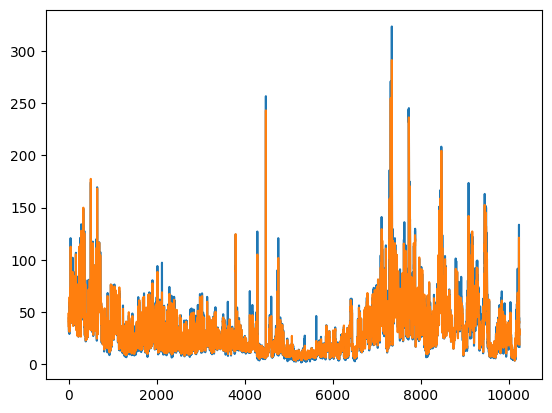

In [43]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [44]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9628265937564369


In [45]:
import joblib
joblib.dump(model, 'UttarPradesh_PM25.pkl')

['UttarPradesh_PM25.pkl']

In [46]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [47]:
pred_check2 = model.predict(X)

In [48]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9471800747505144


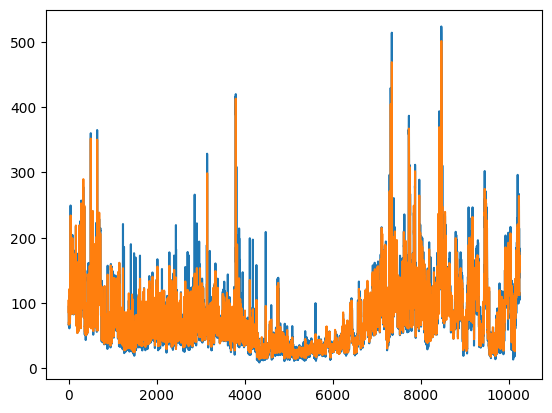

In [49]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [50]:
joblib.dump(model, 'UttarPradesh_PM10.pkl')

['UttarPradesh_PM10.pkl']